# CAMPUS RECRUITMENT | Análise dos dados de recrutamento no campus

### Introdução

O recrutamento no campus é uma estratégia para buscar, engajar e contratar jovens talentos para estágios e cargos de nível básico. O recrutamento universitário é tipicamente uma tática para empresas de médio a grande porte com necessidades de recrutamento de alto volume, mas pode variar de pequenos esforços (como trabalhar com centros de carreira universitários para obter candidatos em potencial) a operações de grande escala (como visitar uma ampla gama de das faculdades e participando de eventos de recrutamento durante o semestre de primavera e outono). O recrutamento no campus geralmente envolve trabalhar com centros universitários de serviços de carreira e participar de feiras de carreira para conhecer pessoalmente estudantes universitários e recém-formados.

Contexto do nosso conjunto de dados: Nosso conjunto de dados gira em torno da temporada de colocação de uma escola de negócios no Brasil. Onde há vários fatores sobre os candidatos serem contratados, como experiência de trabalho, porcentagem do exame etc., finalmente contém o status do recrutamento e detalhes da remuneração.

#### DECLARAÇÃO DO PROBLEMA

- Este conjunto de dados consiste em dados de colocação de alunos em um campus XYZ. Inclui percentual e especialização do ensino médio e superior. Também inclui especialização de graduação, tipo e experiência de trabalho e ofertas salariais para os alunos colocados

#### DICIONÁRIO DE DADOS

- sl_no : Serial Number
- gender: Gender- Male='M',Female='F'
- ssc_p : Secondary Education percentage- 10th Grade
- ssc_b : Board of Education- Central/ Others
- hsc_b : Higher Secondary Education percentage- 12th Grade
- hsc_s : Specialization in Higher Secondary Education
- degree_p: Degree Percentage
- degree_t: Under Graduation(Degree type)- Field of degree education
- workex : Work Experience
- etest_p: Entrance Test Percentage
- mba_p: MBA Percentage
- status : Placed or not
- salary : Salary offered

### BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
def infos(data):
    print('====================== Shape ========================')
    print(data.shape)
    print('====================== Info =========================')
    print(data.info())
    print('====================== NA ===========================')
    print(data.isnull().sum())
    print('====================== Duplicated ===================')
    print(data.duplicated().sum())
    print('====================== Nunique ======================')
    print(data.nunique())
    
infos(df)

====================== Shape ========================
(215, 15)
====================== Info =========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: floa

- Há valores ausentes na coluna salary, vamos substituir os valores Nan por 0, que vai significar que não estão recebendo salário por não estarem empregados.

In [35]:
df['salary'] = df['salary'].astype('float64')

In [36]:
df['salary'].fillna('0', inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   hsc_s           215 non-null    object 
 4   degree_p        215 non-null    float64
 5   degree_t        215 non-null    object 
 6   workex          215 non-null    object 
 7   etest_p         215 non-null    float64
 8   specialisation  215 non-null    object 
 9   mba_p           215 non-null    float64
 10  status          215 non-null    object 
 11  salary          215 non-null    float64
dtypes: float64(6), object(6)
memory usage: 20.3+ KB


In [38]:
df.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [86]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [88]:
df.drop(df[['sl_no', 'ssc_b', 'hsc_b']], axis = 1, inplace = True)

KeyError: "None of [Index(['sl_no', 'ssc_b', 'hsc_b'], dtype='object')] are in the [columns]"

In [41]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [42]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [43]:
df.describe(include = 'O')

,gender,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215
unique,2,3,3,2,2,2
top,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,113,145,141,120,148


### VARIÁVEIS CATEGÓRICAS

In [44]:
cat = df.select_dtypes(include = [np.object])
cat.head()

,gender,hsc_s,degree_t,workex,specialisation,status
0,M,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


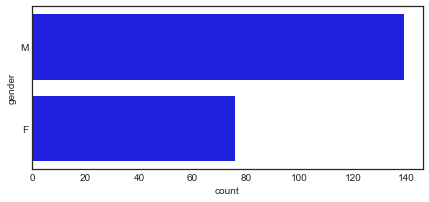

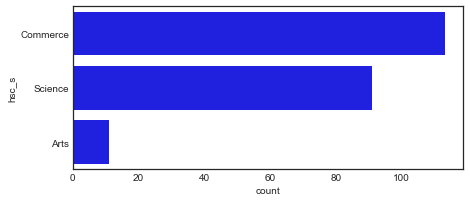

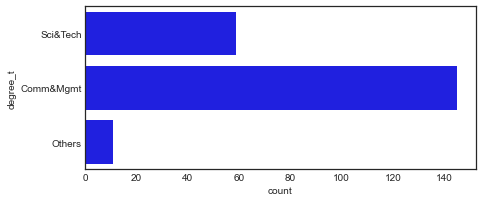

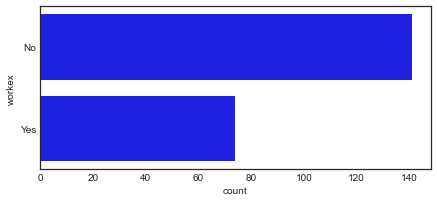

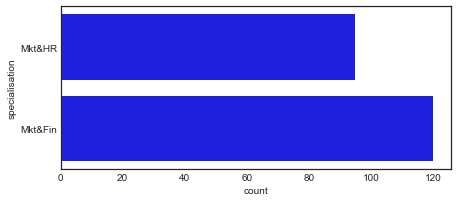

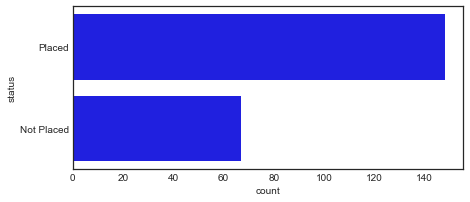

In [45]:
catArr = df[['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']]

for i in catArr:
    f, ax = plt.subplots(figsize=(7, 3))
    sns.countplot(y=df[i], data=df, color="blue")

- Grande parte dos alunos são homens.
- Em hsc_s a maioria escolhida é Commerce.
- Em degree_t a maioria escolhida é Comm&Mgmt.
- A maioria não possui workex - experiência de trabalho.
- Em specialisation a maioria é Mkt&Fin.
- Em status a maioria estão em Placed.

### VARIÁVEIS NÚMERICAS

In [46]:
num = df.select_dtypes(include = [np.float64, np.int64])
num.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0


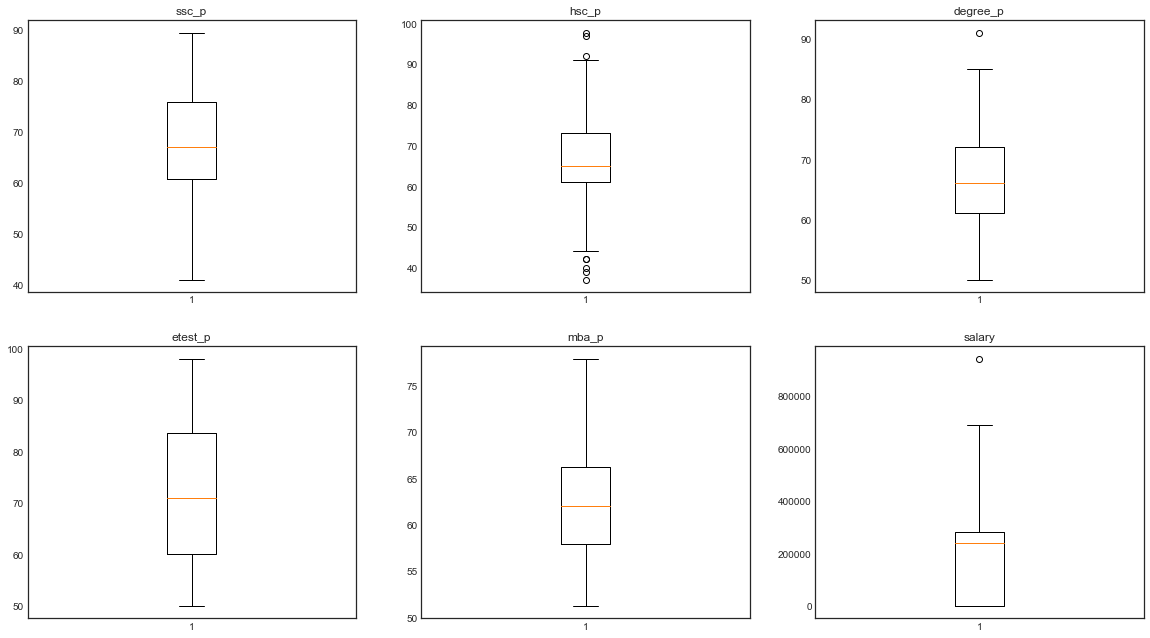

In [47]:
numArr = list(num)

plt.figure(figsize = (20,35))

for i in range(len(numArr)):
    plt.subplot(6, 3, i + 1)
    plt.boxplot(df[numArr[i]])
    plt.title(numArr[i])
    
    


- Como podemos ver, temos valores discrepantes na feature hsc_p

### REMOVENDO OUTLIERS

In [48]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 * IQR)
df1 = df.loc[filter]

Text(0.5, 1.0, 'Depois de remover os outliers')

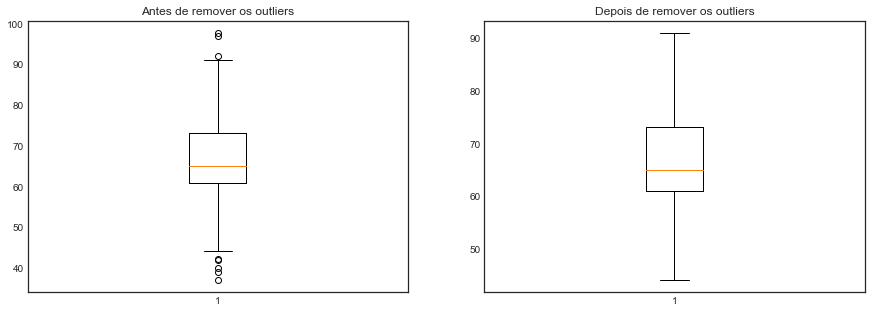

In [49]:
plt.figure(figsize = (15,5))
plt.style.use('seaborn-white')
ax = plt.subplot(121)
plt.boxplot(df['hsc_p'])
ax.set_title('Antes de remover os outliers')
ax = plt.subplot(122)
plt.boxplot(df1['hsc_p'])
ax.set_title('Depois de remover os outliers')

### ANÁLISE BIVARIADA E MULTIVARIADA

<AxesSubplot:xlabel='gender', ylabel='count'>

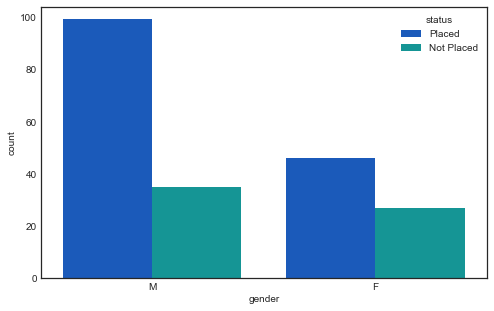

In [50]:
# GENDER

plt.figure(figsize=(8,5))
sns.countplot('gender', hue='status', data = df1, palette = 'winter')

- Os alunos do sexo masculino tendem a ter sido colocados em maior número quando comparados com os do sexo feminino.

In [51]:
avg_per= df1.groupby(['gender','status'])['ssc_p'].mean()
avg_per

gender  status    
F       Not Placed    59.012593
        Placed        73.866304
M       Not Placed    57.261429
        Placed        70.605960
Name: ssc_p, dtype: float64

- Observamos que a maior porcentagem média para Masculino e Feminino que são colocados é de 70% e 74% respectivamente.

<AxesSubplot:xlabel='status', ylabel='ssc_p'>

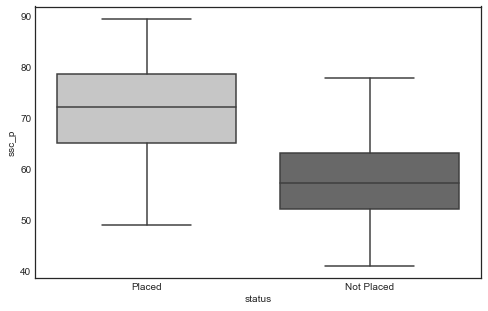

In [52]:
# ssc_p

plt.figure(figsize=(8,5))
sns.boxplot('status', 'ssc_p', data = df1, palette = 'Greys')

- A percentagem mínima para o Ensino Secundário onde um estudante do sexo masculino é colocado é de 49%.
- A percentagem máxima para o Ensino Secundário onde é colocado um aluno do sexo masculino é de 89,4%.

<AxesSubplot:xlabel='status', ylabel='hsc_p'>

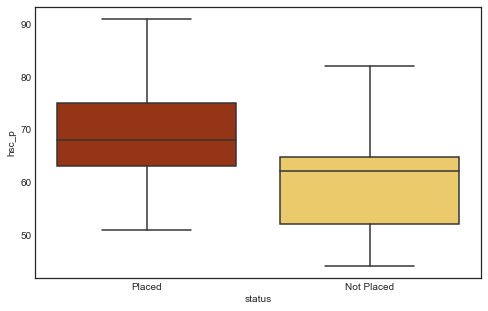

In [53]:
# hsc_p

plt.figure(figsize=(8,5))
sns.boxplot(y = 'hsc_p', x = 'status', data = df1, palette = 'afmhot')

- A percentagem mínima para o ensino secundário superior onde um estudante do sexo masculino é colocado é de 51%.
- A percentagem máxima para o ensino secundário superior onde um estudante do sexo masculino é colocado é de 98%.

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

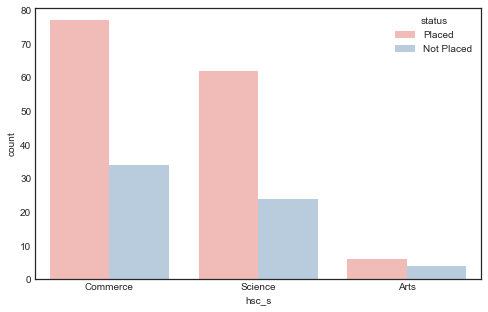

In [54]:
# hsc_s

plt.figure(figsize=(8,5))
sns.countplot('hsc_s',hue='status',data=df1,palette="Pastel1")

- Os alunos que optaram pela especialização em Comércio durante o Ensino Médio são altamente recrutados.
- Os alunos que optaram pela especialização em Artes durante o Ensino Médio têm menos chances de serem colocados.

<AxesSubplot:xlabel='status', ylabel='degree_p'>

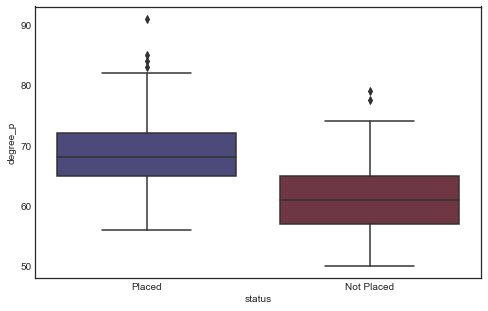

In [55]:
# degree_p

plt.figure(figsize=(8,5))
sns.boxplot(y='degree_p',x='status',data=df1,palette="icefire")

- A percentagem mínima para o ensino secundário superior onde uma aluna é colocada é de 56%.
- A percentagem máxima para o ensino secundário superior onde uma aluna é colocada é de 91%.

<AxesSubplot:xlabel='degree_t', ylabel='count'>

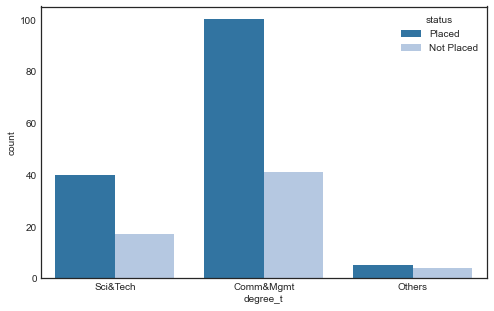

In [56]:
# degree_t

plt.figure(figsize=(8,5))
sns.countplot('degree_t',hue='status',data=df1,palette="tab20")

- Os alunos que optaram pela especialização em Comércio na licenciatura são altamente recrutados.
- Os alunos que optaram pela especialização Outros na licenciatura são menos propensos a serem colocados.

<AxesSubplot:xlabel='degree_t', ylabel='degree_p'>

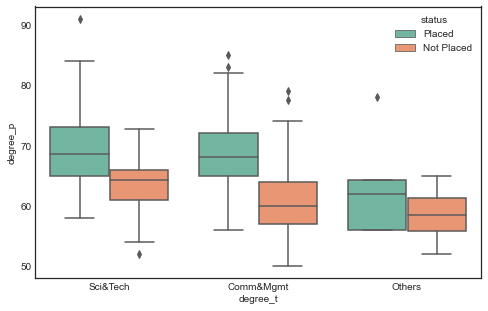

In [57]:
# degree_t / degree_p / status

plt.figure(figsize=(8,5))
sns.boxplot('degree_t','degree_p',hue='status',data=df1,palette="Set2")

- A porcentagem mínima para o estudante de graduação ser colocado em especializações como Comércio e Gestão, Ciência e Tecnologia e Outros é de 56%.
- A porcentagem máxima para o aluno de graduação ser colocado em especializações como Comércio e Gestão, Ciência e Tecnologia é de 85% e 91%, respectivamente.

<AxesSubplot:xlabel='workex', ylabel='count'>

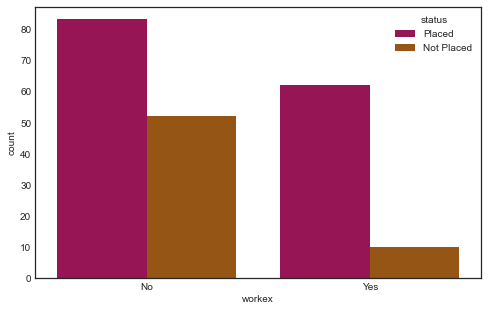

In [58]:
# workex 

plt.figure(figsize=(8,5))
sns.countplot('workex',hue='status',data=df1,palette="brg")

- Tivemos a maioria dos alunos sem experiência e também esses alunos são colocados em grande número.

<AxesSubplot:xlabel='status', ylabel='etest_p'>

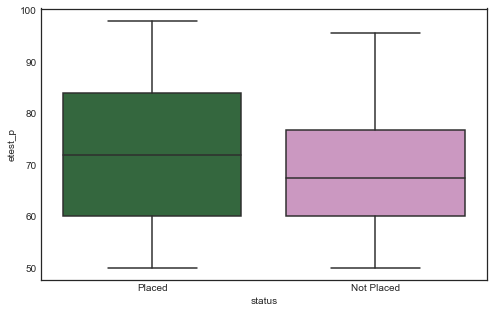

In [59]:
# etest_p

plt.figure(figsize=(8,5))
sns.boxplot(y='etest_p',x='status',data=df1,palette="cubehelix")

- Os alunos que são colocados tiveram boa pontuação no teste de admissão.

<AxesSubplot:xlabel='specialisation', ylabel='count'>

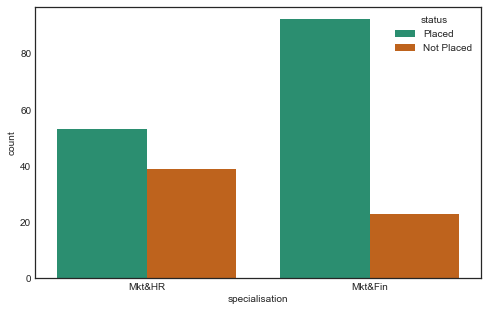

In [60]:
# specialisation

plt.figure(figsize=(8,5))
sns.countplot('specialisation',hue='status',data=df1,palette="Dark2")

- Como o MBA em finanças é uma das formas de especialização mais populares e altamente escolhidas, também temos a maioria dos alunos que optaram pelo mesmo e são colocados com sucesso em grande número.

<AxesSubplot:xlabel='specialisation', ylabel='mba_p'>

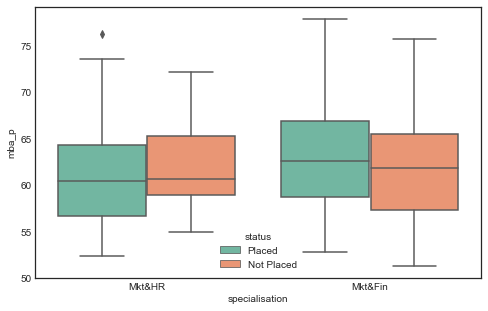

In [61]:
# specialisation / mba_p / status

plt.figure(figsize=(8,5))
sns.boxplot('specialisation','mba_p',hue='status',data=df1,palette="Set2")

- A porcentagem mínima para o aluno colocado em MBA Especialização em Marketing e RH e Marketing e Finanças é de 53% e 54%, respectivamente.
- A porcentagem máxima para o aluno colocado em MBA Especialização em Marketing e RH e Marketing e Finanças é de 76% e 79%, respectivamente.

In [62]:
# salary

df1.iloc[df1['salary'].argmax()]

gender                    M
ssc_p                  60.8
hsc_p                  68.4
hsc_s              Commerce
degree_p               64.6
degree_t          Comm&Mgmt
workex                  Yes
etest_p               82.66
specialisation      Mkt&Fin
mba_p                 64.34
status               Placed
salary             940000.0
Name: 119, dtype: object

In [63]:
df1.iloc[df1['salary'].argmin()]

gender                     M
ssc_p                   56.0
hsc_p                   52.0
hsc_s                Science
degree_p                52.0
degree_t            Sci&Tech
workex                    No
etest_p                 66.0
specialisation        Mkt&HR
mba_p                  59.43
status            Not Placed
salary                   0.0
Name: 3, dtype: object

In [64]:
df1[(df1['status'] == 'Placed') & (df1['specialisation'] == 'Mkt&Fin')][['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'salary']].sort_values(by = 'salary', ascending = False)

,ssc_p,hsc_p,degree_p,mba_p,salary
119,60.80,68.40,64.60,64.34,940000.0
150,71.00,58.66,58.00,61.30,690000.0
77,64.00,80.00,65.00,57.65,500000.0
174,73.24,50.83,64.27,66.23,500000.0
163,63.00,67.00,64.00,66.46,500000.0
...,...,...,...,...,...
204,74.00,73.00,73.00,67.69,210000.0
47,63.00,60.00,57.00,54.55,204000.0
15,65.00,75.00,69.00,64.66,200000.0
44,77.00,73.00,81.00,69.70,200000.0


In [65]:
df1[(df1['status'] == 'Placed') & (df1['specialisation'] == 'Mkt&HR')][['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'salary']].sort_values(by = 'salary', ascending = False)

,ssc_p,hsc_p,degree_p,mba_p,salary
53,80.00,70.00,72.00,71.04,450000.0
128,80.40,73.40,77.72,76.26,400000.0
145,89.40,65.66,71.25,63.23,400000.0
101,63.00,72.00,68.00,60.44,380000.0
104,69.00,63.00,65.00,58.23,360000.0
22,69.80,60.80,72.23,68.81,360000.0
178,68.00,56.00,68.00,68.07,350000.0
37,79.00,76.00,65.60,55.47,320000.0
35,69.00,78.00,72.00,62.74,300000.0
43,87.00,87.00,68.00,62.90,300000.0


- É evidente que as percentagens em ssc_p, hsc_p, degree_p e mba_p não irão agregar valor ao salário oferecido.

<AxesSubplot:>

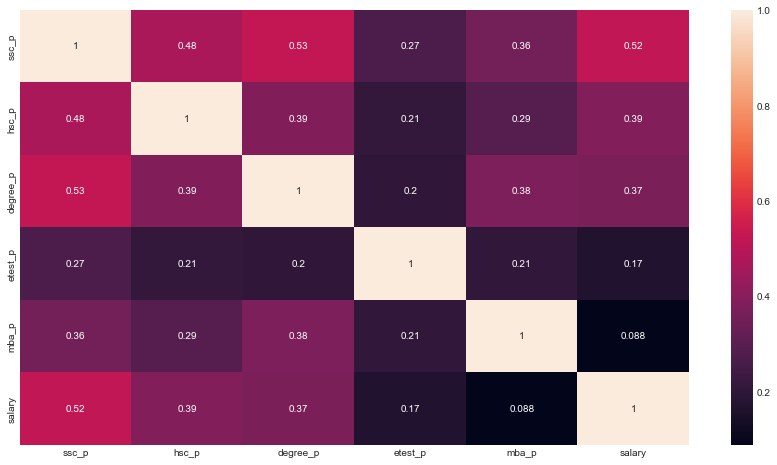

In [66]:
plt.figure(figsize = (15,8))
sns.heatmap(df1.corr(), annot = True)

- Candidatos que foram bons em seus acadêmicos tiveram um bom desempenho na escola, graduação, mba e até teste de empregabilidade
- Estas percentagens não têm qualquer influência sobre o seu salário

In [67]:
df1.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [68]:
df1['status'] = df1['status'].map({'Placed':1, 'Not Placed':0})
df1['workex'] = df1['workex'].map({'Yes':1, 'No':0})

In [69]:
df1 = pd.get_dummies(data = df1, columns = ['gender', 'hsc_s', 'degree_t', 'specialisation'], drop_first = True)

In [70]:
df1.head(20)

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
0,67.00,91.00,58.00,0,55.00,58.80,1,270000.0,1,1,0,0,1,1
1,79.33,78.33,77.48,1,86.50,66.28,1,200000.0,1,0,1,0,1,0
2,65.00,68.00,64.00,0,75.00,57.80,1,250000.0,1,0,0,0,0,0
3,56.00,52.00,52.00,0,66.00,59.43,0,0.0,1,0,1,0,1,1
4,85.80,73.60,73.30,0,96.80,55.50,1,425000.0,1,1,0,0,0,0
5,55.00,49.80,67.25,1,55.00,51.58,0,0.0,1,0,1,0,1,0
6,46.00,49.20,79.00,0,74.28,53.29,0,0.0,0,1,0,0,0,0
7,82.00,64.00,66.00,1,67.00,62.14,1,252000.0,1,0,1,0,1,0
8,73.00,79.00,72.00,0,91.34,61.29,1,231000.0,1,1,0,0,0,0
9,58.00,70.00,61.00,0,54.00,52.21,0,0.0,1,1,0,0,0,0


### MODELAGEM

In [71]:
X = df1.drop(['status', 'salary'],1)
y = df1['status']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 22)

In [73]:
X_train.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'gender_M',
       'hsc_s_Commerce', 'hsc_s_Science', 'degree_t_Others',
       'degree_t_Sci&Tech', 'specialisation_Mkt&HR'],
      dtype='object')

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 166 to 121
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ssc_p                  165 non-null    float64
 1   hsc_p                  165 non-null    float64
 2   degree_p               165 non-null    float64
 3   workex                 165 non-null    int64  
 4   etest_p                165 non-null    float64
 5   mba_p                  165 non-null    float64
 6   gender_M               165 non-null    uint8  
 7   hsc_s_Commerce         165 non-null    uint8  
 8   hsc_s_Science          165 non-null    uint8  
 9   degree_t_Others        165 non-null    uint8  
 10  degree_t_Sci&Tech      165 non-null    uint8  
 11  specialisation_Mkt&HR  165 non-null    uint8  
dtypes: float64(5), int64(1), uint8(6)
memory usage: 10.0 KB


In [75]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [77]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  3],
       [ 1, 27]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

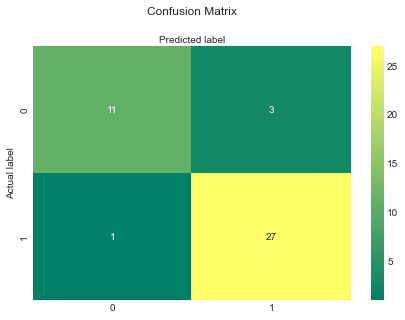

In [78]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'summer', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [79]:
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
print('Precision:',precision_score(y_test, y_pred) * 100)
print('Recall:', recall_score(y_test, y_pred) * 100)

Accuracy: 90.47619047619048
Precision: 90.0
Recall: 96.42857142857143


In [80]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [81]:
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)

Accuracy: 83.33333333333334


In [82]:
df1.head()

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
0,67.00,91.00,58.00,0,55.0,58.80,1,270000.0,1,1,0,0,1,1
1,79.33,78.33,77.48,1,86.5,66.28,1,200000.0,1,0,1,0,1,0
2,65.00,68.00,64.00,0,75.0,57.80,1,250000.0,1,0,0,0,0,0
3,56.00,52.00,52.00,0,66.0,59.43,0,0.0,1,0,1,0,1,1
4,85.80,73.60,73.30,0,96.8,55.50,1,425000.0,1,1,0,0,0,0


In [83]:
features = ['ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 
            'mba_p', 'gender_M', 'hsc_s_Commerce', 'hsc_s_Science',
            'degree_t_Others', 'degree_t_Sci&Tech', 'specialisation_Mkt&HR']

In [84]:
feature_imp = pd.Series(clf.feature_importances_, index = features).sort_values(ascending = False)
feature_imp

ssc_p                    0.268029
hsc_p                    0.195864
degree_p                 0.178721
mba_p                    0.114178
etest_p                  0.096582
specialisation_Mkt&HR    0.040547
workex                   0.026913
gender_M                 0.020779
hsc_s_Science            0.017273
hsc_s_Commerce           0.016031
degree_t_Sci&Tech        0.015702
degree_t_Others          0.009382
dtype: float64

<AxesSubplot:>

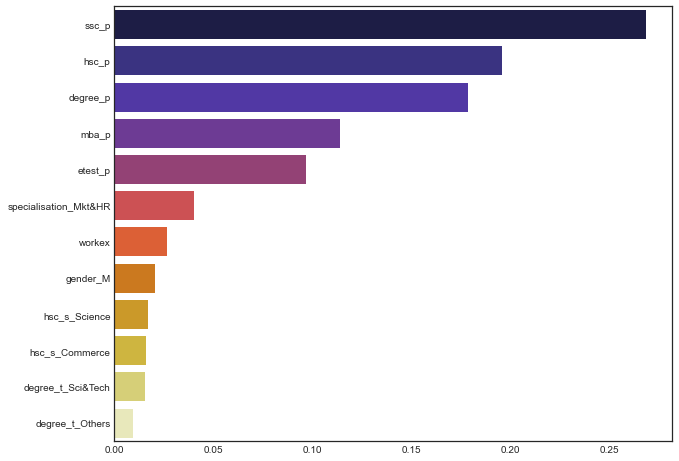

In [85]:
plt.figure(figsize = (10,8))
sns.barplot(y = feature_imp.index, x = feature_imp.values, palette = 'CMRmap')

Os 5 principais recursos que podem prever se o aluno é colocado/não colocado em Campus Placements são:
- Porcentagem SSC
- Porcentagem HSC
- Porcentagem de Grau
- Porcentagem do Teste de Entrada
- Porcentagem de MBA